In [3]:
###Evaluation for clustering
#km = KMeans(n_clusters=true_k, init='k-means++', verbose=0)
### Zif's law https://en.wikipedia.org/wiki/Zipf%27s_law
from IPython.display import Image

### Kmeans clustering
1. demo https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

### Evaluation for clusterings
1. Not given labels:
    1. Compactness, Separation...
2. Given labels (ground truth):
    1. Pairwise measures
    2. Entropy based measures
3. Additional Resources:
    1. https://zh.coursera.org/learn/cluster-analysis/lecture/RJJfM/6-2-clustering-evaluation-measuring-clustering-quality

### Contingency Matrix

### Homogeneity
1. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

  http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html
  <!-- <img src="homogeneity.png"/> -->

### Completeness 
1. A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

  http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score
<!-- <img src="completeness.png"/> -->

### Adjusted Rand Score
1. The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

  http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score
2. Example for Rand Index: https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

### Adjusted Mutual Info Score
1. Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. 

  http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score

  https://en.wikipedia.org/wiki/Adjusted_mutual_information
2. MI: https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

### KMeans clustering in `sklearn`
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from time import time
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

dataset = fetch_20newsgroups(subset='all', categories=None,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
X = vectorizer.fit_transform(dataset.data)

from sklearn.cluster import KMeans, MiniBatchKMeans
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

18846 documents
20 categories

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
done in 131.385s



In [7]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))

print()

Homogeneity: 0.320
Completeness: 0.382
V-measure: 0.348
Adjusted Rand-Index: 0.119



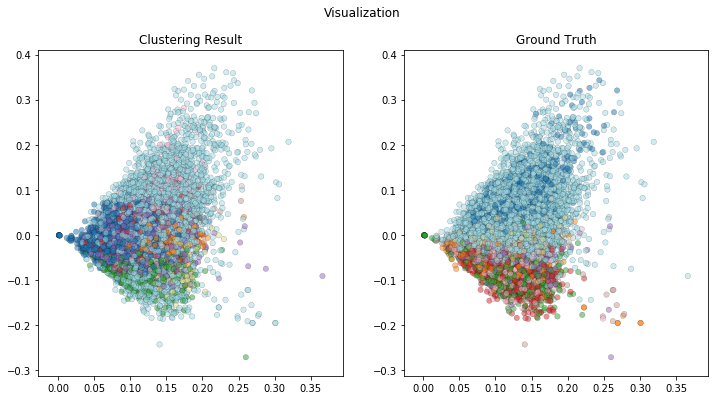

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)

Xr_2d = svd.fit_transform(X)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(x=Xr_2d[:,0], y=Xr_2d[:,1], c=km.labels_, edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('Vega20'),vmin=0, vmax=20, alpha=0.5)    
#     centroids = result_to_vis['centroids']
# ax1.scatter(x=centroids[:,0], y=centroids[:,1], color='k', alpha=0.5)
ax1.set_title('Clustering Result')

ax2.scatter(x=Xr_2d[:,0], y=Xr_2d[:,1], c=labels, edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('Vega20'),vmin=0, vmax=20, alpha=0.5)
ax2.set_title('Ground Truth')
fig.suptitle('Visualization')
# plt.savefig("p4b_vis_nmf_%s.pdf" % normalizer_name)

In [8]:
from sklearn.metrics.cluster import homogeneity_score,completeness_score, adjusted_rand_score, adjusted_mutual_info_score

print(homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]))
print(homogeneity_score([0, 1, 1, 1], [1, 1, 0, 0])) 
## Completeness
print(completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))
print(completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))
print(completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

1.0
0.383688546596
1.0
0.0
0.0


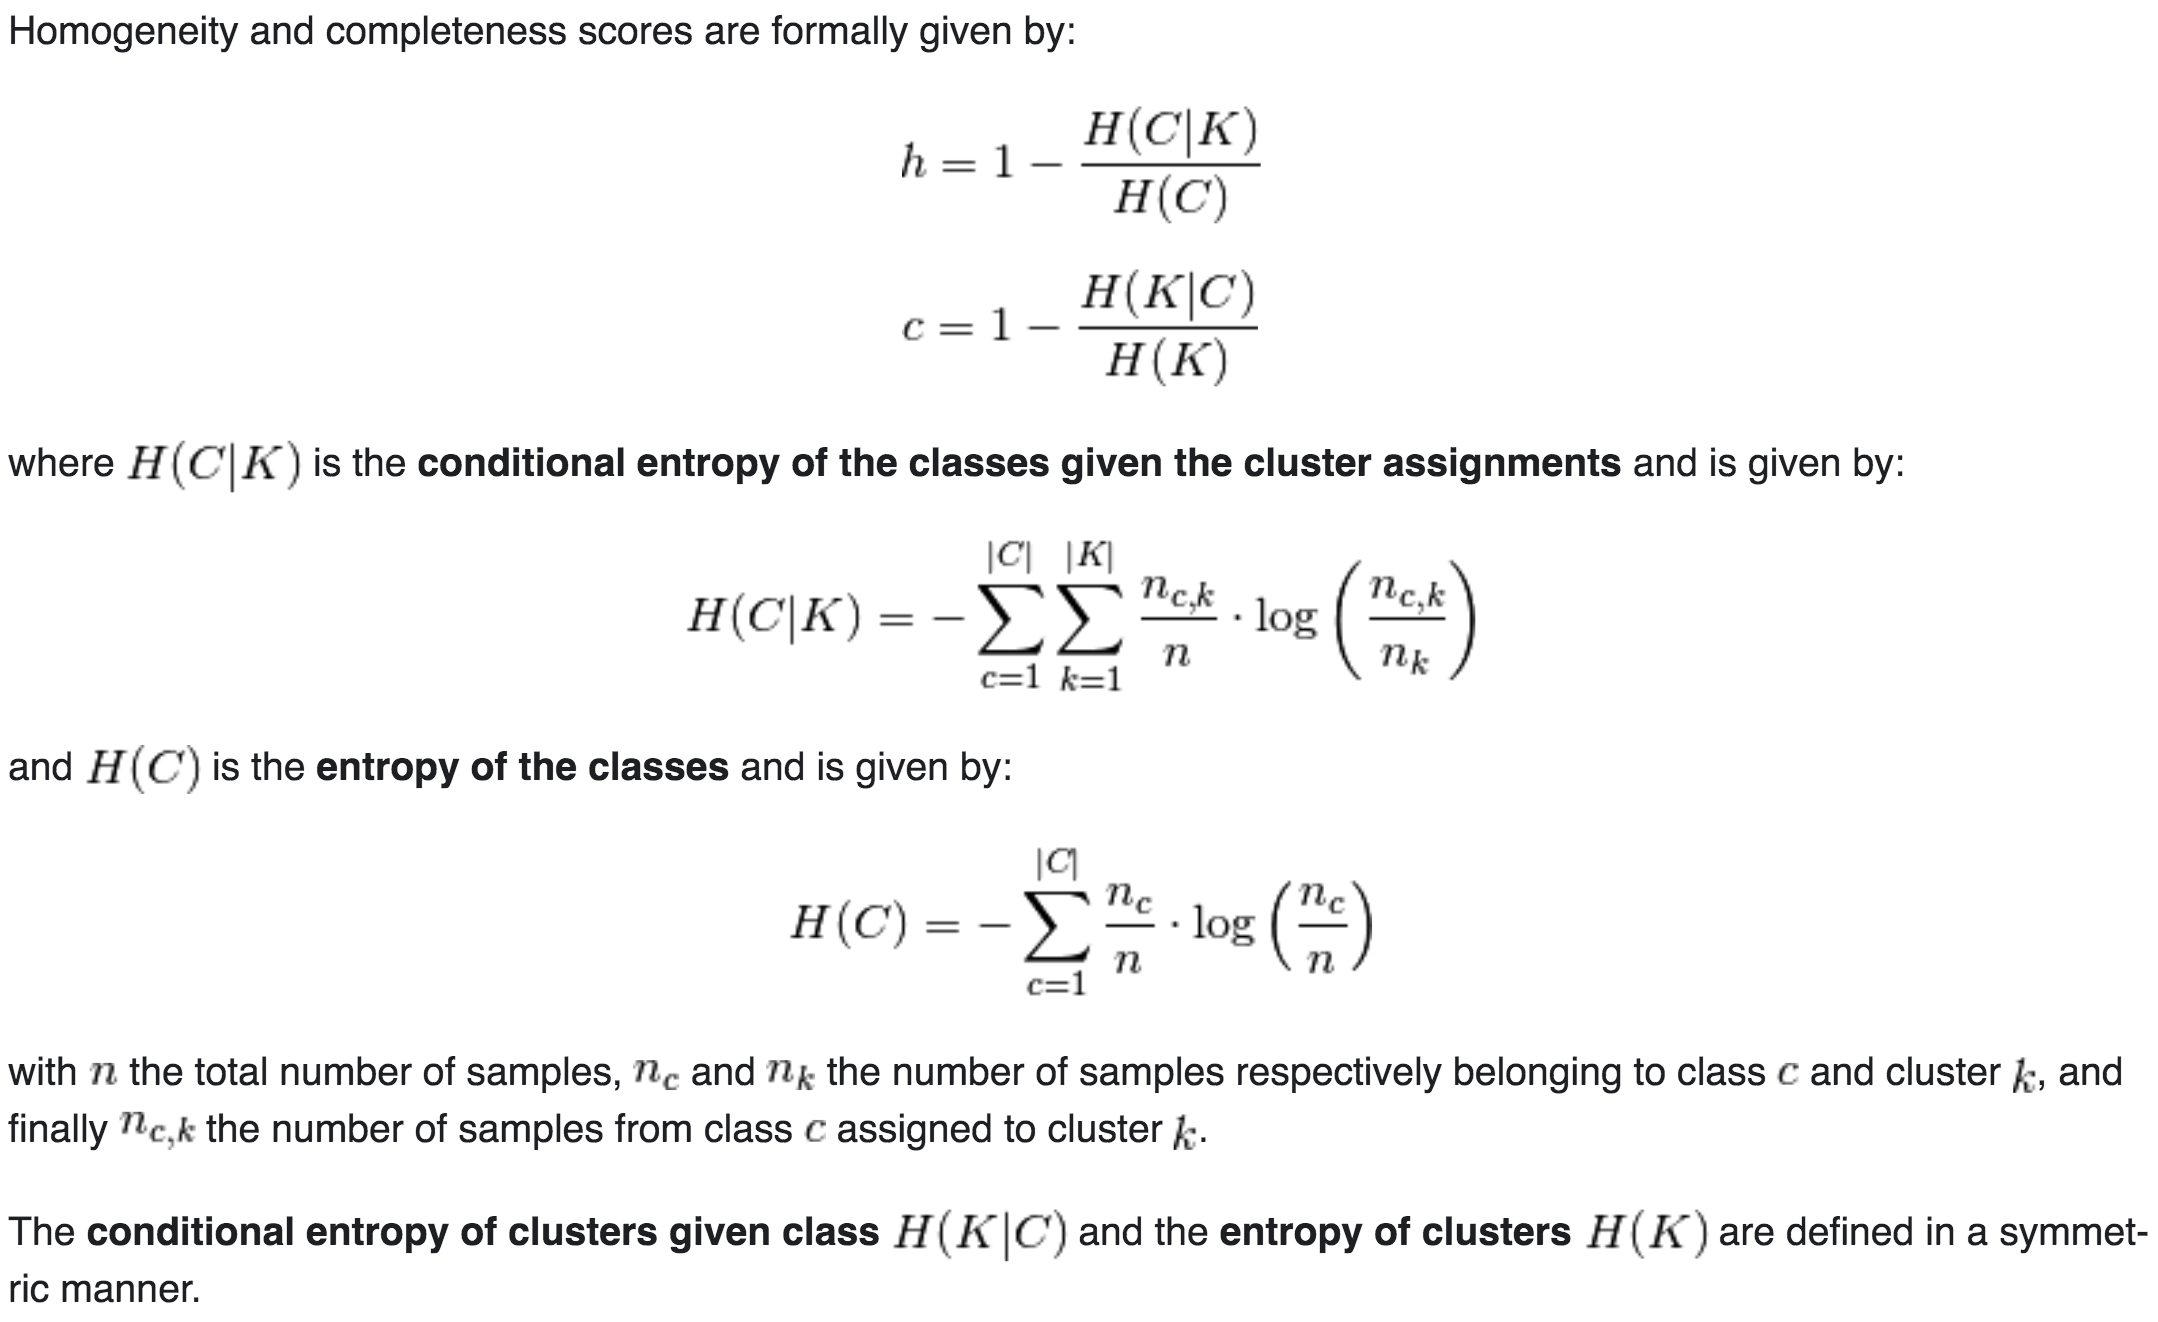